In [2]:
import pandas as pd
import numpy as np



In [3]:
df_raw=pd.read_csv("./부품수리시간.csv")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


<Axes: xlabel='UNITS', ylabel='MINUTES'>

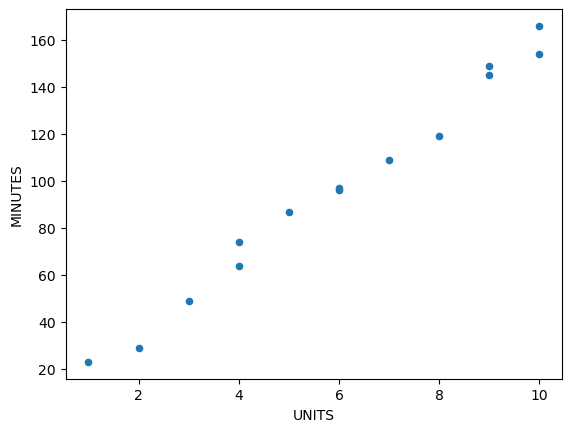

In [5]:
## 변수간의 경향성을 파악하기 
df_raw.plot.scatter(x='UNITS', y='MINUTES')

In [6]:
### 상관관계 분석 
df_raw.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


# 다중 선형 회귀분석 연습


In [30]:
# 데이터 분석 패키지 불러오기 

import pandas as pd
import numpy as np

#데이터 시각화 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 회귀 모델 
import statsmodels.formula.api as smf

#잔차의 정규성 확인  
from statsmodels.api import qqplot, add_constant

#다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용/ 평가용데이터 분리 
from sklearn.model_selection import train_test_split

# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE

#SCALE 변환 
from sklearn.preprocessing import StandardScaler

#평가 함수 
from sklearn.metrics import r2_score

In [31]:
## 한글 폰트 적용 
matplotlib.rc("font", family='NanumGothic')
matplotlib.rc("axes", unicode_minus=False)

In [32]:
df_raw=pd.read_csv("./체질검사.csv", encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [33]:
## 결측치 확인

df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [34]:
## 단위와 같이 표현되어 있는 수치형 변수 처리 

df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)

df_raw['WEIGHT']=df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT']=df_raw['HEIGHT'].astype('float64')
df_raw.info()


#단위를 나타내는 항목 제외 
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)

#범주형 변수의 dummy변수화 
df_raw_dummy=pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


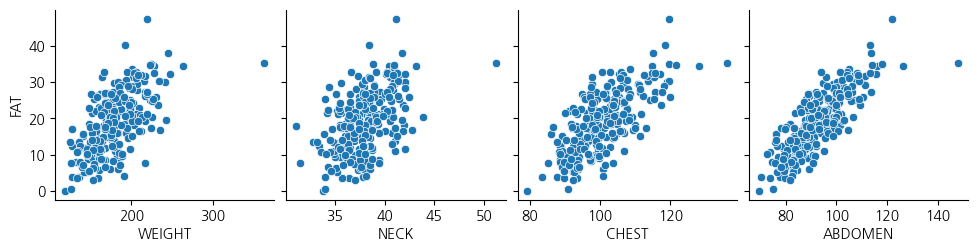

In [6]:
## 산점도 행렬 목표변수와 설명변수 지정
sns.pairplot(df_raw_dummy,y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])

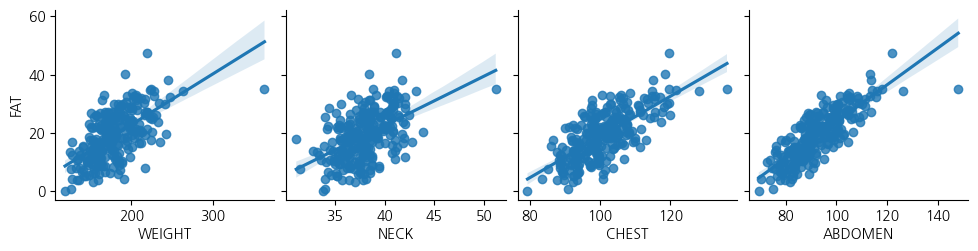

In [7]:
# 회귀 적합성 추가 
sns.pairplot(df_raw_dummy,y_vars='FAT',x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'],kind='reg')

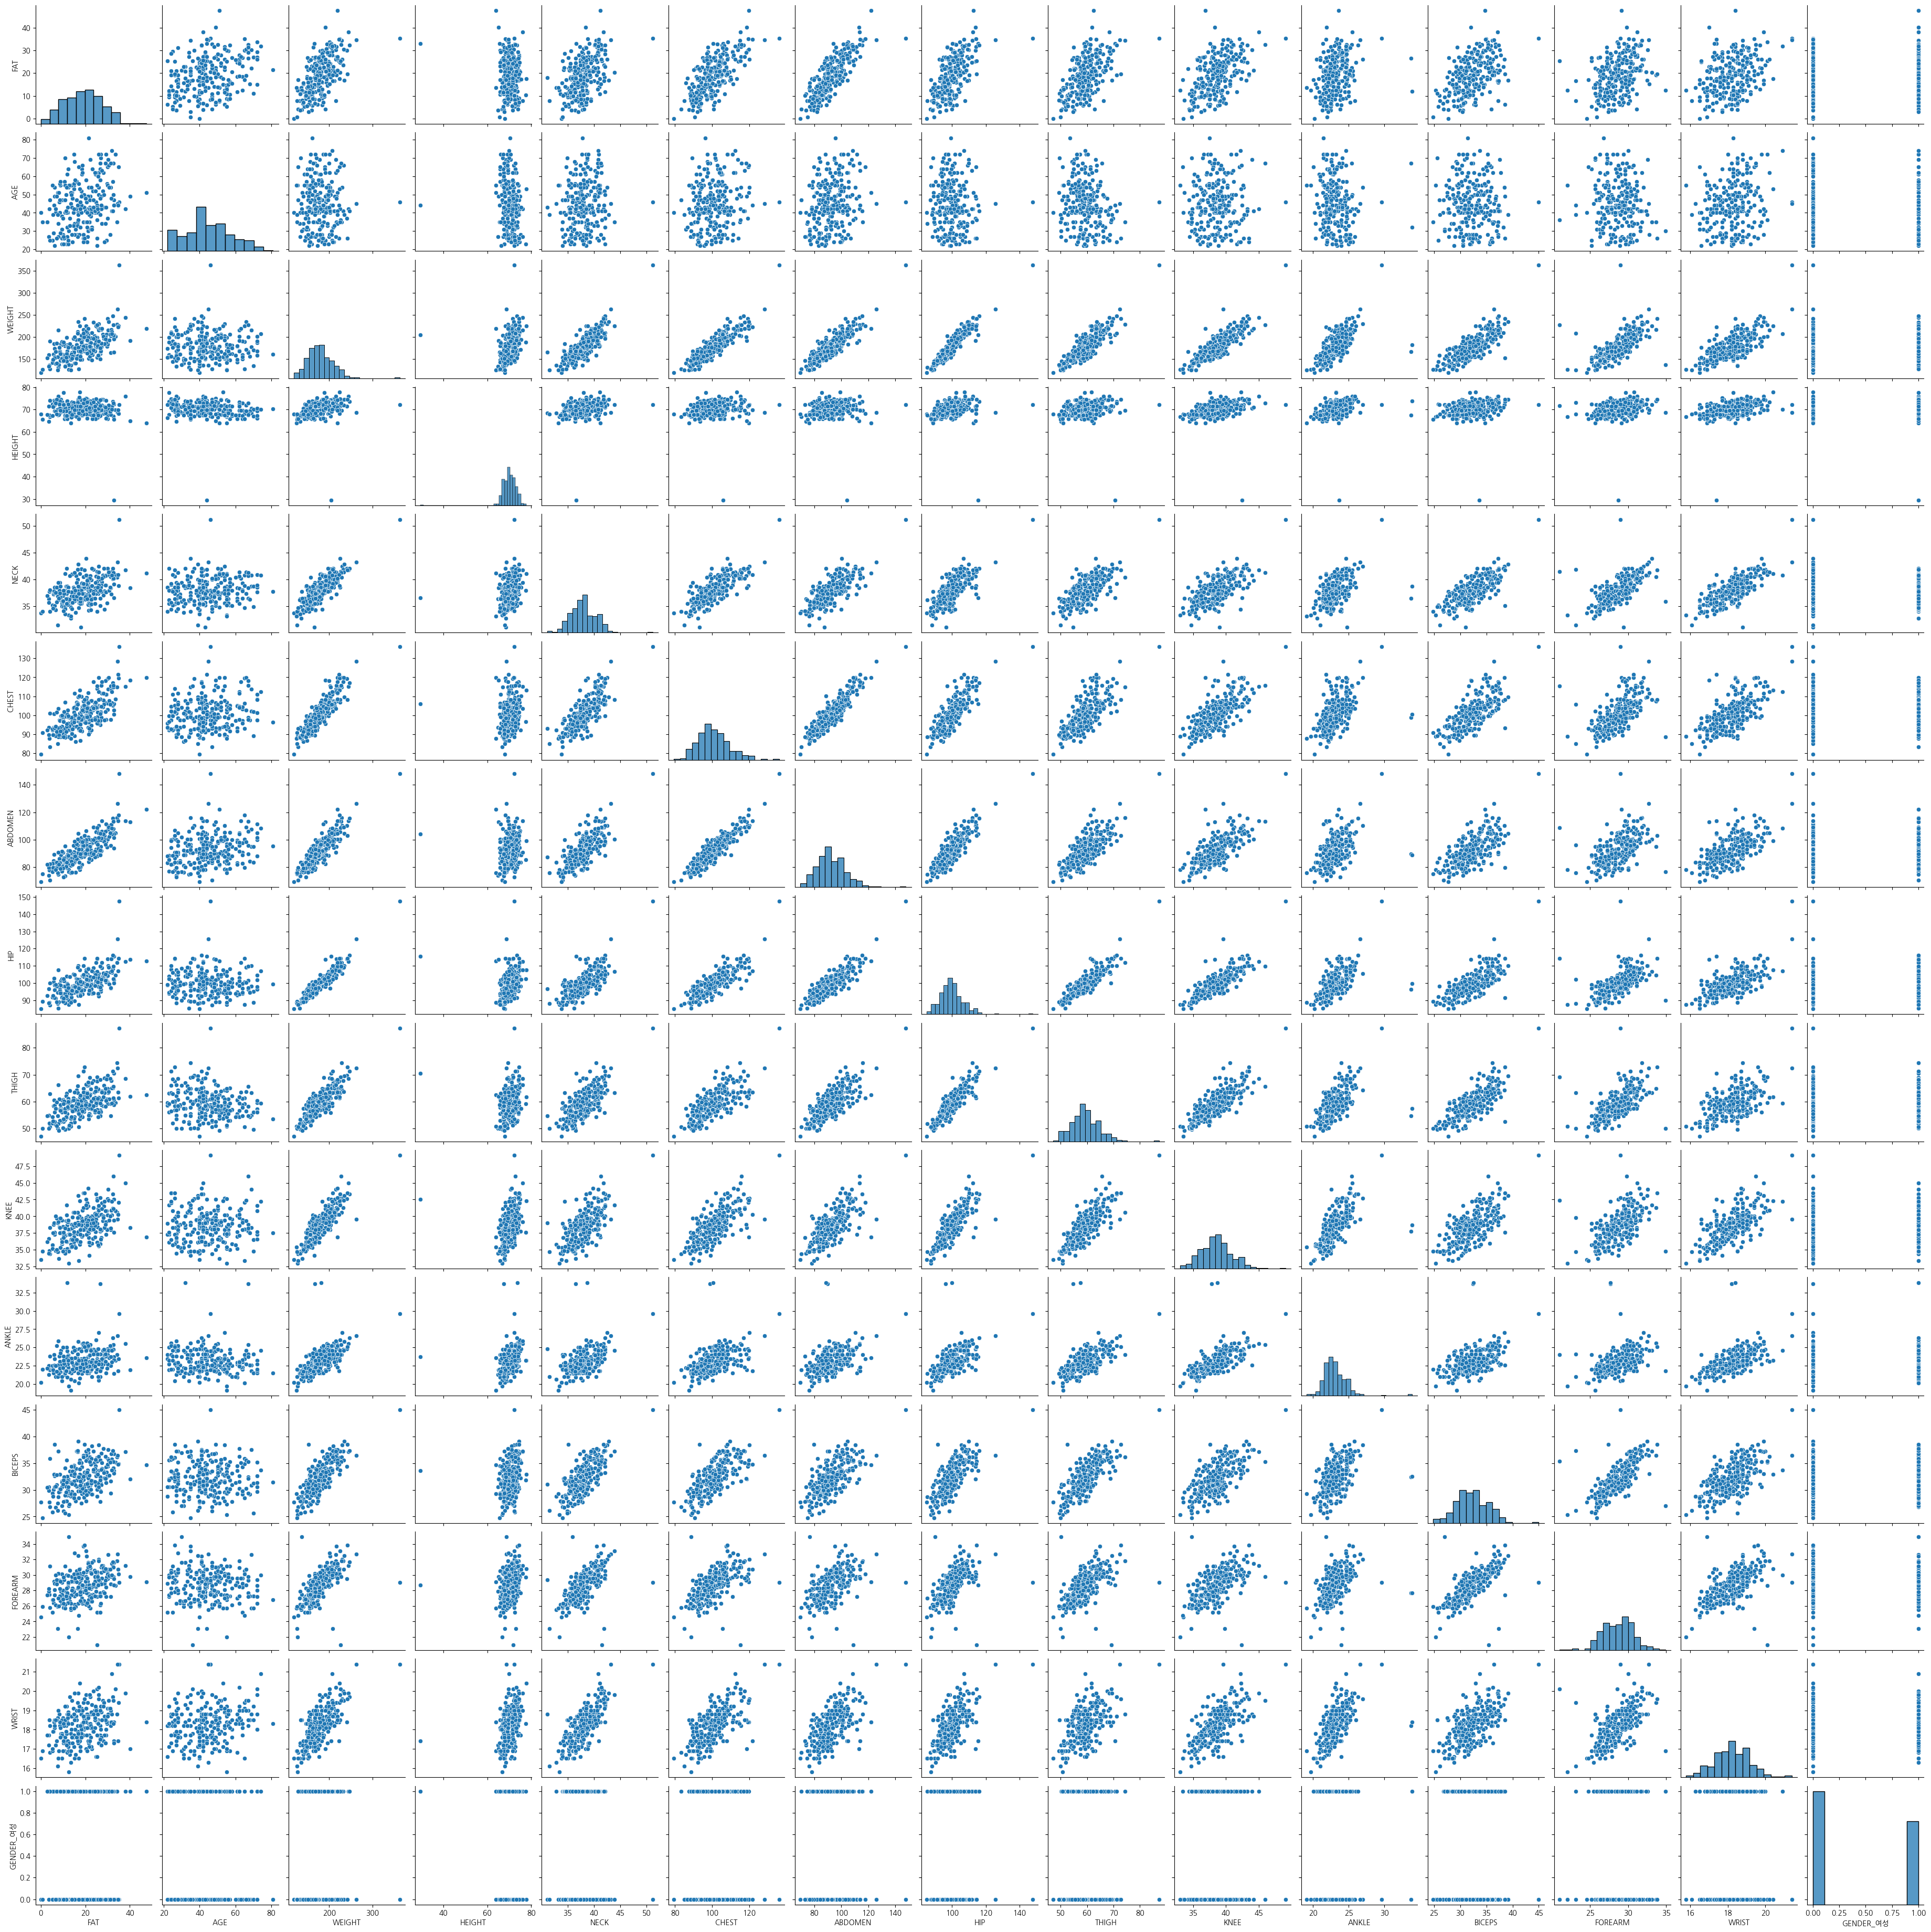

In [8]:
#산점도 행렬 전체 숫자형 변수
sns.pairplot(df_raw_dummy)



In [35]:
# 상관 관계분석
df_raw_dummy.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.033
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.063
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,-0.009
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,0.025
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.010
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.014
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.017
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.042
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.040
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.034


In [36]:
## 회귀 모델 생성
## train test분리 
df_train,df_test=train_test_split(df_raw_dummy,test_size=0.3,random_state=1234)
print(f"train_data_size{df_train.shape}")
print(f"train_data_size{df_test.shape}")

train_data_size(176, 15)
train_data_size(76, 15)


In [37]:
## 선형 회귀 분석 
reg_model=smf.ols(formula='FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+WRIST+GENDER_여성',data=df_train)

#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     38.25
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           6.43e-44
Time:                        19:06:39   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     161   BIC:                             1068.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8459     20.984     -1.708      0.0

In [12]:
#인# 설명 변수 간의 다중 공산성 확인 
df_train_X=df_train.drop('FAT',axis=1)


In [38]:
## statsmodel의 상수항 추가함수 적용 
df_train_x_const=add_constant(df_train_X)

## 데이터 프레임으로 저장
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns

df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)for i in range(df_train_x_const.shape[1])]


#df_vif정렬
df_vif.sort_values('VIF',ascending=True).round(3)

,variable,VIF
1,HEIGHT,1.137
5,FOREARM,1.573
2,NECK,2.867
3,ABDOMEN,4.908
4,HIP,4.946
0,const,516.314


In [39]:
## 선형 회귀 분석 
#모델에서 WEIGHT제거
reg_model=smf.ols(formula='FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+WRIST+GENDER_여성',data=df_train)

#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     40.16
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           6.67e-44
Time:                        19:07:20   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1023.
Df Residuals:                     162   BIC:                             1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1903      8.664      0.253      0.8

In [40]:
## 다중 공선성 재확인
# 설명 변수 간의 다중 공산성 확인 
df_train_X=df_train.drop(['FAT','WEIGHT'],axis=1)

## statsmodel의 상수항 추가함수 적용 
df_train_x_const=add_constant(df_train_X)

## 데이터 프레임으로 저장
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns

df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)for i in range(df_train_x_const.shape[1])]


#df_vif정렬
df_vif.sort_values('VIF',ascending=True).round(3)

,variable,VIF
13,GENDER_여성,1.038
2,HEIGHT,1.358
11,FOREARM,2.031
9,ANKLE,2.105
1,AGE,2.342
10,BICEPS,3.373
12,WRIST,3.419
3,NECK,3.807
8,KNEE,4.645
4,CHEST,8.810


In [41]:
## 선형 회귀 분석 
#모델에서 WEIGHT제거
reg_model=smf.ols(formula='FAT~AGE+HEIGHT+NECK+ABDOMEN+HIP+FOREARM',data=df_train)

#적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     85.15
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.73e-48
Time:                        19:07:49   Log-Likelihood:                -501.58
No. Observations:                 176   AIC:                             1017.
Df Residuals:                     169   BIC:                             1039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2239      8.277     -0.027      0.9

In [42]:
## 다중공선성 재확인 

df_train_x=df_train[['HEIGHT','NECK','ABDOMEN','HIP','FOREARM']]

## statsmodel의 상수항 추가함수 적용 
df_train_x_const=add_constant(df_train_x)

## 데이터 프레임으로 저장
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns

df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)for i in range(df_train_x_const.shape[1])]


#df_vif정렬
df_vif.sort_values('VIF',ascending=True).round(3)

,variable,VIF
1,HEIGHT,1.137
5,FOREARM,1.573
2,NECK,2.867
3,ABDOMEN,4.908
4,HIP,4.946
0,const,516.314


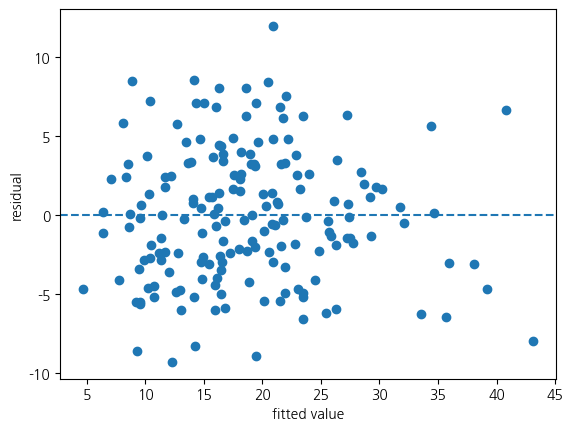

In [18]:
#잔차의 산점도 .. 
## 등분산성 검정

plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='--')

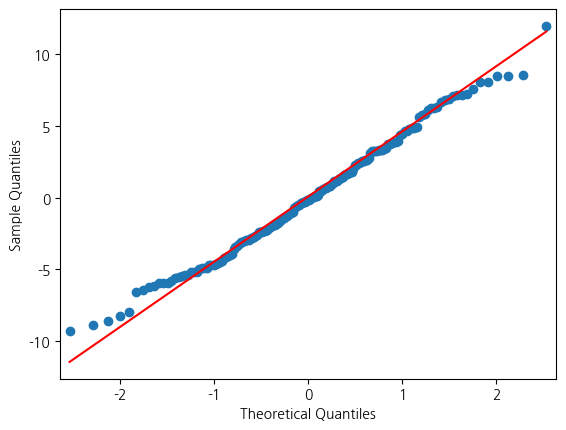

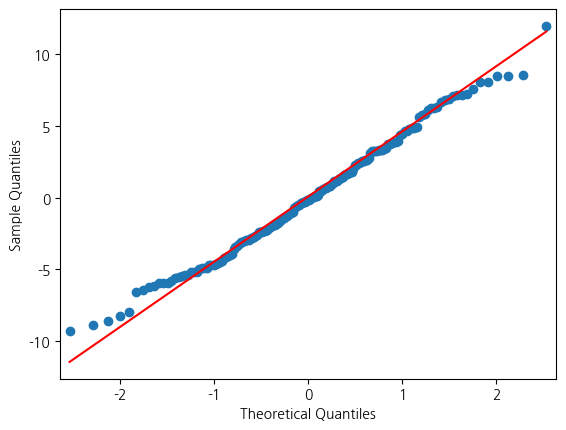

In [19]:
# 정규성 검정 
### 잔차의 정규성 검정 
qqplot(reg_result.resid, line='q')

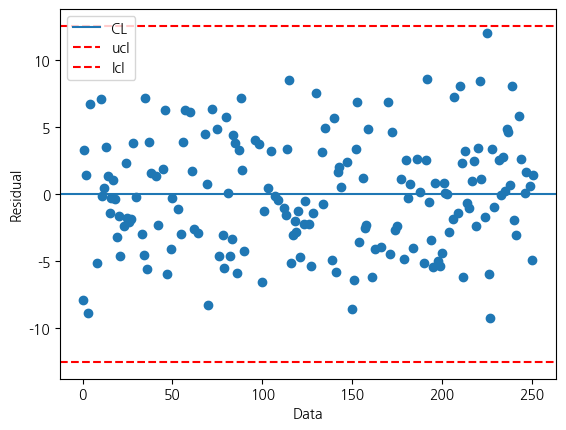

In [20]:
### 독립성 검정 
### 잔차의 독립성 확인

plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data')
plt.ylabel('Residual')
plt.axhline(y=0,linestyle='-',label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--',color='red',label='ucl')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='dashed',color='red',label='lcl')
plt.legend()

In [43]:
### 모델의 성능확인 
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)

##print
print(f"train data의 결정계수{r2_score(df_train['FAT'] ,train_pred)}")
print(f"test data의 결정계수{r2_score(df_test['FAT'], test_pred)}")

train data의 결정계수0.7514305757337131
test data의 결정계수0.6559777745831017


In [22]:
# 평가용 데이터에 대한 실제 값과 예측값 확인 
print(f"test_data의 실제값\n{df_test['FAT'].head(10)}")
print(f"test_data의 예측값\n{test_pred[:10]}")

test_data의 실제값
208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test_data의 예측값
208    13.662145
94     17.329338
31     35.582772
248    19.421054
216    22.972118
6      18.500031
91     14.977647
73     12.459244
129    15.906938
5      24.819102
dtype: float64


In [44]:
## 후진 제거법을 이용한 변수 선택

## 목표변수와 설명변수 분리 
df_train_y=df_train['FAT']
df_train_x=df_train.drop('FAT',axis=1)

#sklearn의 선형회귀 모델
model=LinearRegression()

##전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_train_x,df_train_y)

## 선택된 변수 
selected_cols=df_train_x.columns[rfe.support_]

#제거된 변수 
removed_cols=df_train_x.columns[~rfe.support_]


## 선택된 변수 
print(f"Selected Variable {selected_cols}")
print(f"Removed Variable {removed_cols}")

Selected Variable Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed Variable Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [45]:
# 선택된 변수 개수 확인
print(f"Selected Variables (count: {len(selected_cols)}): {selected_cols}")
print(f"Removed Variables (count: {len(removed_cols)}): {removed_cols}")


Selected Variables (count: 5): Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables (count: 9): Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [25]:
# 후진 제거법을 이용한 변수 선택 및 모델 생성 
# 회귀 모델생성 
rfe_reg_model=smf.ols(formula='FAT~NECK+ABDOMEN+ANKLE+FOREARM+WRIST', data=df_train)

#적합
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.07e-45
Time:                        19:01:55   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

<Axes: >

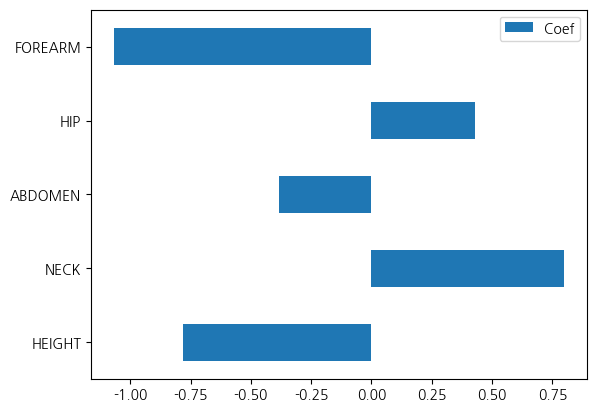

In [48]:
# 절편을 제외한 회귀 계수만 사용
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index=['HEIGHT', 'NECK', 'ABDOMEN', 'HIP', 'FOREARM'])

# 수평 막대 그래프 그리기
df_reg_coef.plot.barh(y="Coef")


# ridge, lasso 연습 하기 


In [49]:
## 패키지 불러오기 
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [50]:
## 목표변수 설명변수 데이터 지정 하기 

df_raw_y=df_raw_dummy['FAT']
df_raw_x=df_raw_dummy.drop('FAT',axis=1, inplace=False)

# train/ test data 분리 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y, test_size=0.3, random_state=1234)

print(f"train data x size: {df_train_x.shape}")
print(f"train data x size: {df_train_y.shape}")
print(f"train data x size: {df_test_x.shape}")
print(f"train data x size: {df_test_y.shape}")


train data x size: (176, 14)
train data x size: (176,)
train data x size: (76, 14)
train data x size: (76,)


-36.02048952086594


<Axes: >

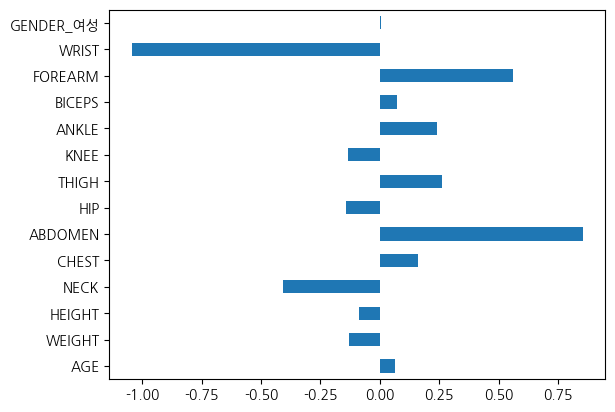

In [51]:
### 모델 생성 
ridge=Ridge(random_state=1234, alpha=1)
ridge.fit(df_train_x,df_train_y)

#절편값 확인 
print(ridge.intercept_)

# 회귀계수 확인 

df_ridge_coef=pd.DataFrame({"Coef":ridge.coef_},index=df_train_x.columns)
df_ridge_coef

## 회귀계수 그래프 
df_ridge_coef.plot.barh(y="Coef",legend=False)

In [53]:
### 규제화회귀 모델 생성 : ridge 모델
###모델의 성능 
train_pred=ridge.predict(df_train_x)
test_pred=ridge.predict(df_test_x)

print(f"train data 결정계수:{r2_score(df_train_y,train_pred)}")

print(f"test data 결정계수:{r2_score(df_test_y,test_pred)}")



train data 결정계수:0.7688328070099064
test data 결정계수:0.6641259577188776


In [54]:
# 평가용 데이터에 대한 실제 값과 예측값 확인 
print(f"test_data의 실제값\n{df_test_y[:10]}")
print(f"test_data의 예측값\n{test_pred[:10]}")

test_data의 실제값
208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test_data의 예측값
[13.60282604 16.45073408 37.04384853 18.84719908 22.29182243 19.66883071
 16.30261479 12.57672671 14.84682774 23.98304519]


-39.35090439476542


<Axes: >

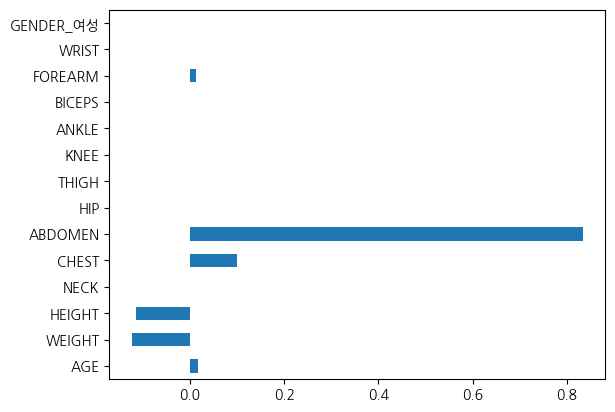

In [56]:
### 모델 생성 lasso
lasso=Lasso(random_state=1234, alpha=1)
lasso.fit(df_train_x,df_train_y)

#절편값 확인 
print(lasso.intercept_)

# 회귀계수 확인 

df_lasso_coef=pd.DataFrame({"Coef":lasso.coef_},index=df_train_x.columns)
df_lasso_coef

## 회귀계수 그래프 
df_lasso_coef.plot.barh(y="Coef",legend=False)

In [57]:
### 규제화회귀 모델 생성 : LASSO 모델
###모델의 성능 
train_pred=lasso.predict(df_train_x)
test_pred=lasso.predict(df_test_x)

print(f"train data 결정계수:{r2_score(df_train_y,train_pred)}")

print(f"test data 결정계수:{r2_score(df_test_y,test_pred)}")



train data 결정계수:0.7448823019911712
test data 결정계수:0.6397843604404867


In [58]:
# 평가용 데이터에 대한 실제 값과 예측값 확인 
print(f"test_data의 실제값\n{df_test_y[:10]}")
print(f"test_data의 예측값\n{test_pred[:10]}")

test_data의 실제값
208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test_data의 예측값
[14.47038363 16.28754934 33.67464732 18.10744338 23.79126879 19.65277966
 14.95597729  9.61780438 16.5146437  23.5350198 ]


-47.00875497399707


<Axes: >

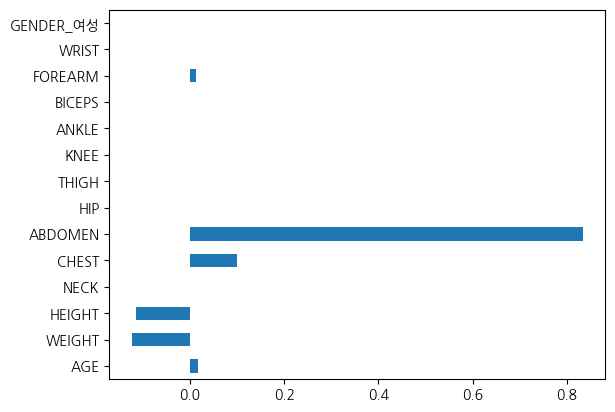

In [60]:
### 모델 생성 ElasticNet모델
elastic=ElasticNet(random_state=1234, alpha=1)
elastic.fit(df_train_x,df_train_y)

#절편값 확인 
print(elastic.intercept_)

# 회귀계수 확인 

df_elastic_coef=pd.DataFrame({"Coef":lasso.coef_},index=df_train_x.columns)
df_elastic_coef

## 회귀계수 그래프 
df_elastic_coef.plot.barh(y="Coef",legend=False)

In [61]:
### 규제화회귀 모델 생성 : LASSO 모델
###모델의 성능 
train_pred=elastic.predict(df_train_x)
test_pred=elastic.predict(df_test_x)

print(f"train data 결정계수:{r2_score(df_train_y,train_pred)}")
print(f"test data 결정계수:{r2_score(df_test_y,test_pred)}")


train data 결정계수:0.7549442655494084
test data 결정계수:0.636671178295827


In [62]:
# 평가용 데이터에 대한 실제 값과 예측값 확인 
print(f"test_data의 실제값\n{df_test_y[:10]}")
print(f"test_data의 예측값\n{test_pred[:10]}")

test_data의 실제값
208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test_data의 예측값
[13.73844662 16.36476248 34.61249368 18.55642767 23.40560299 19.81954034
 15.17420329 10.47756547 16.18488347 23.83687672]
